In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brendan45774/test-file")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/test-file


Cleaned Data Shape: (332, 4)


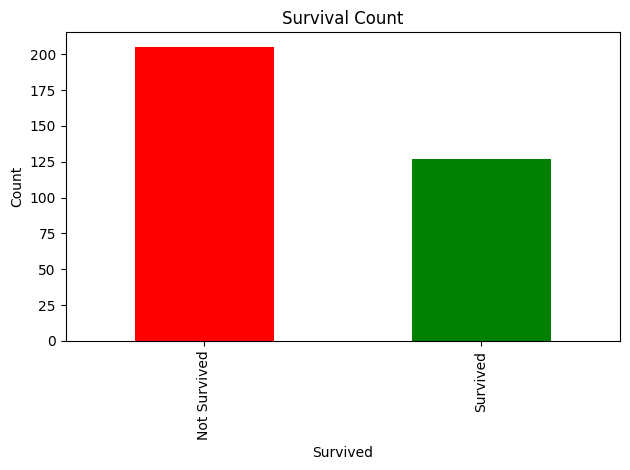

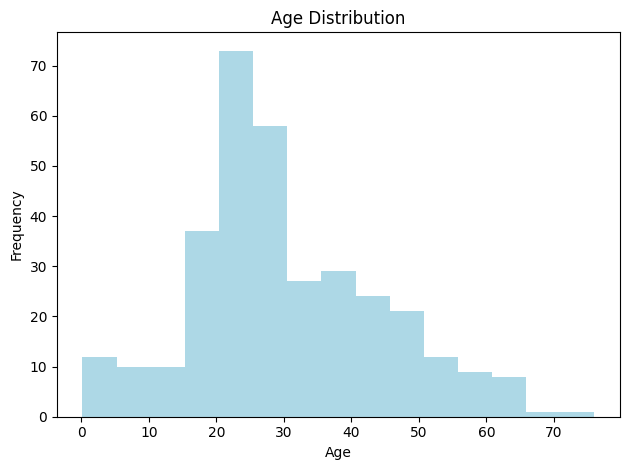

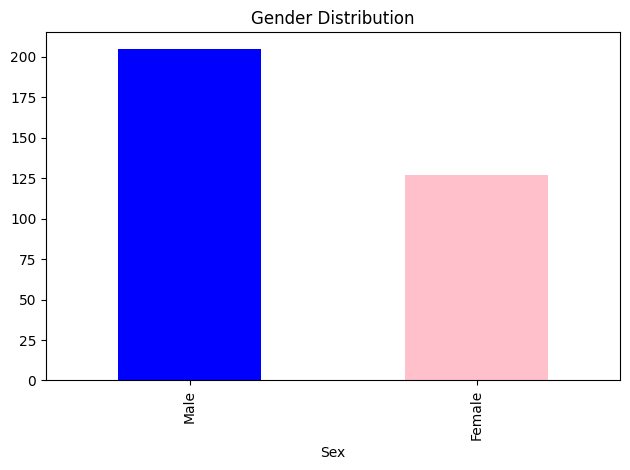

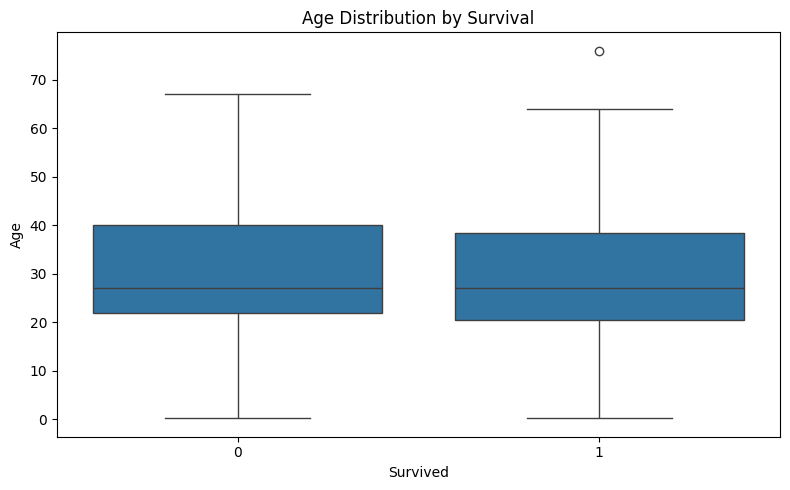


Tuning Logistic Regression...
Best Params: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000

Tuning K-Nearest Neighbors...
Best Params: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.8955, Precision: 0.9091, Recall: 0.8000

Tuning Support Vector Machine...
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000

Summary of Model Performance:
                     Model  Accuracy  Precision  Recall
0     Logistic Regression  1.000000   1.000000     1.0
1     K-Nearest Neighbors  0.895522   0.909091     0.8
2  Support Vector Machine  1.000000   1.000000     1.0


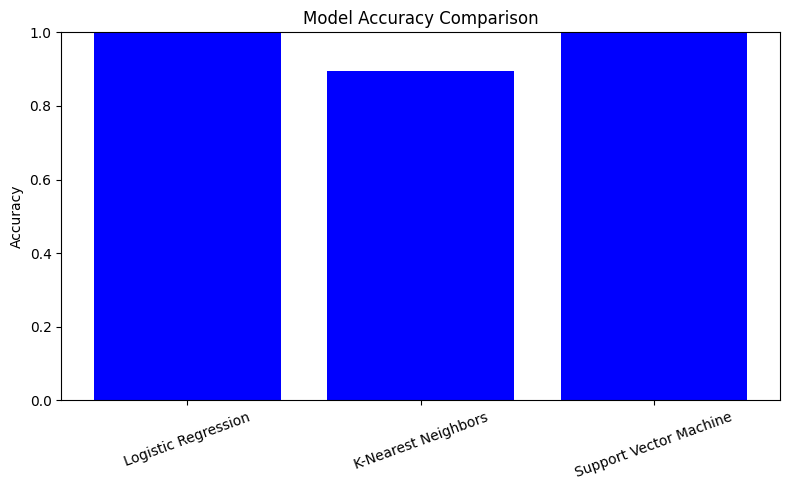


 Prediction for Pclass=1, Sex=0, Age=18: Survived


In [16]:
# ---------------------- Imports ----------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# ---------------------- Load & Clean Data ----------------------
df = pd.read_csv(path + "/tested.csv")

df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1, inplace=True)

df["Sex"] = df["Sex"].map({'male': 1, 'female': 0})

df.dropna(inplace=True)
print("Cleaned Data Shape:", df.shape)

# ---------------------- Visualizations ----------------------
plt.figure()
df['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title("Survival Count")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(df["Age"], bins=15, color='lightblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure()
df['Sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

# ---------------------- Model Training ----------------------
X = df.drop("Survived", axis=1)
y = df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

model_parameters = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    },
    "Support Vector Machine": {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

results = []
best_models = {}

# ---------------------- Grid Search & Evaluation ----------------------
for name, model in models.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(model, model_parameters[name], cv=5)
    grid.fit(x_train, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model

    y_pred = best_model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    print(f"Best Params: {grid.best_params_}")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec
    })

# ---------------------- Plot Results ----------------------
results_df = pd.DataFrame(results)
print("\nSummary of Model Performance:\n", results_df)

plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['Accuracy'], color='blue')
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# ---------------------- Predict on New Sample ----------------------
def predict_survival(model, pclass, sex, age):
    df_sample = pd.DataFrame([[pclass, sex, age]], columns=X.columns)
    prediction = model.predict(df_sample)[0]
    result = "Survived" if prediction == 1 else "Not Survived"
    print(f"\n Prediction for Pclass={pclass}, Sex={sex}, Age={age}: {result}")

final_model = best_models["Support Vector Machine"]
predict_survival(final_model, pclass=1, sex=0, age=18)


In [17]:
df.describe()

,Survived,Pclass,Sex,Age
count,332.000000,332.000000,332.000000,332.000000
mean,0.382530,2.144578,0.617470,30.272590
std,0.486739,0.846283,0.486739,14.181209
min,0.000000,1.000000,0.000000,0.170000
25%,0.000000,1.000000,0.000000,21.000000
50%,0.000000,2.000000,1.000000,27.000000
75%,1.000000,3.000000,1.000000,39.000000
max,1.000000,3.000000,1.000000,76.000000
